In [1]:
import squidpy
%matplotlib nbagg

C:\Users\ccmradmin\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import pandas as pd
import pylab as pl

In [3]:
keithleynano = squidpy.instrument('Keithley2182A', 'GPIB0::7::INSTR')
keithleycurrent = squidpy.instrument('Keithley6220', 'GPIB0::6::INSTR')
ppms = squidpy.instrument('PPMS', '192.168.0.103', 50009)
keithleysource = squidpy.instrument('Keithley2400', 'GPIB0::24::INSTR')
timer = squidpy.instrument('Timer', 'timer')

In [4]:
keithleycurrent.current = 1e-6
keithleycurrent.output='on'

In [5]:
keithleynano.nplc = 1

In [6]:
keithleycurrent.output

'on'

In [7]:
keithleysource.voltage

-6.0

In [14]:
ppms.temperature = 200

In [21]:
keithleynano.voltage/1e-6

-63101.5858

Increase topgate voltage to 2V

In [30]:
topgate = squidpy.Experiment('Apply voltage on topgate')
topgate.sweep('keithleysource.voltage')[0.5:2:0.5]
topgate.sweep('timer.time')[0:2*60:.2]
topgate.measure({'keithleycurrent': ['current'],
                'keithleynano': ['voltage'],
                'keithleysource': ['voltage', 'current'],
                'ppms': ['temperature', 'field'],
                'timer': ['time']})

In [31]:
topgate.run()

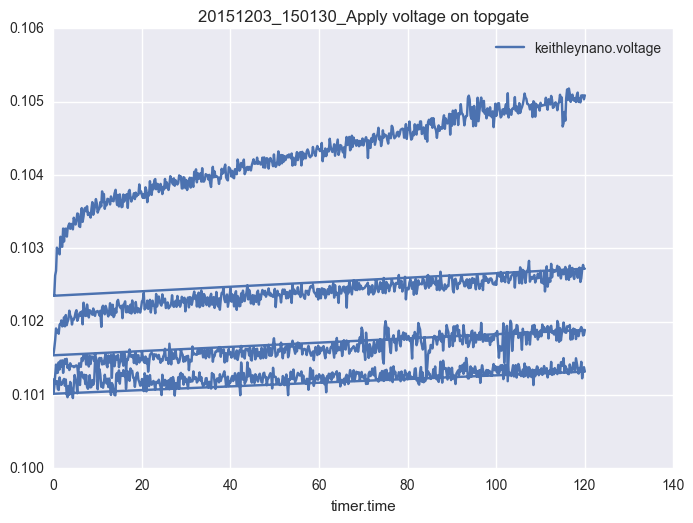

In [34]:
topgate.clear_plot()
topgate.plot('timer.time','keithleynano.voltage')
while topgate.running:
    topgate.update_plot()

Decrease tg voltage to -2V

In [35]:
topgate = squidpy.Experiment('Apply voltage on topgate')
topgate.sweep('keithleysource.voltage')[2:-5:0.1]
topgate.sweep('timer.time')[0:2*60:.2]
topgate.measure({'keithleycurrent': ['current'],
                'keithleynano': ['voltage'],
                'keithleysource': ['voltage', 'current'],
                'ppms': ['temperature', 'field'],
                'timer': ['time']})

In [36]:
topgate.run()

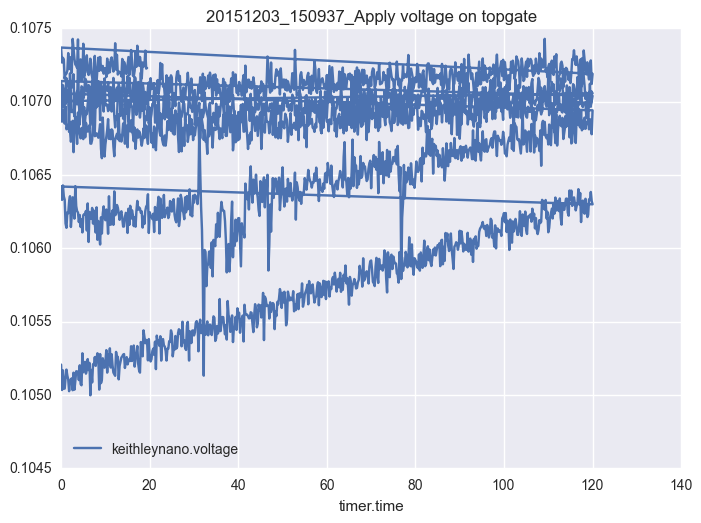

In [38]:
topgate.clear_plot()
topgate.plot('timer.time','keithleynano.voltage')
while topgate.running:
    topgate.update_plot()

In [39]:
topgate.running = False

In [40]:
keithleysource.voltage

1.5

In [41]:
topgate = squidpy.Experiment('Apply voltage on topgate')
topgate.sweep('keithleysource.voltage')[1:0:0.5]
topgate.sweep('timer.time')[0:2*60:.2]
topgate.measure({'keithleycurrent': ['current'],
                'keithleynano': ['voltage'],
                'keithleysource': ['voltage', 'current'],
                'ppms': ['temperature', 'field'],
                'timer': ['time']})

In [42]:
topgate.run()

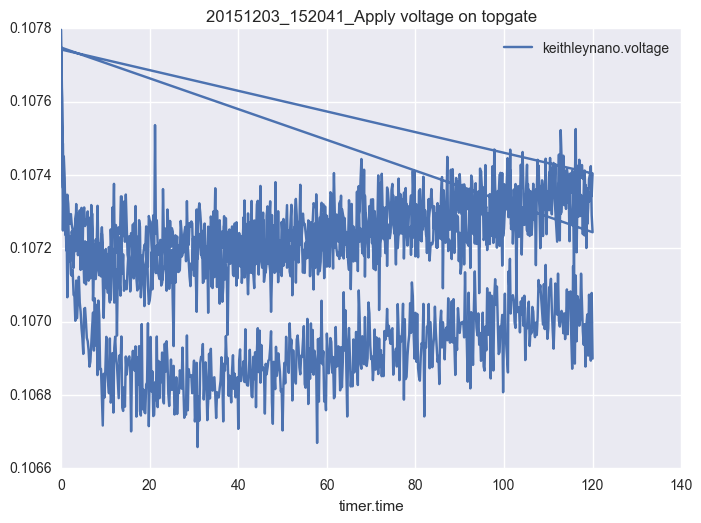

In [43]:
topgate.clear_plot()
topgate.plot('timer.time','keithleynano.voltage')
while topgate.running:
    topgate.update_plot()

In [44]:
allthethings = {'keithleycurrent': ['current'],
                'keithleynano': ['voltage'],
                'keithleysource': ['voltage', 'current'],
                'ppms': ['temperature', 'field'],
                'timer': ['time']}

In [48]:
tg = squidpy.Experiment('Apply voltage on topgate')
tg.sweep('keithleysource.voltage')[0:-5:0.5]
tg.sweep('timer.time')[0:2*60:.2]
tg.measure(allthethings)

In [49]:
tg.run()

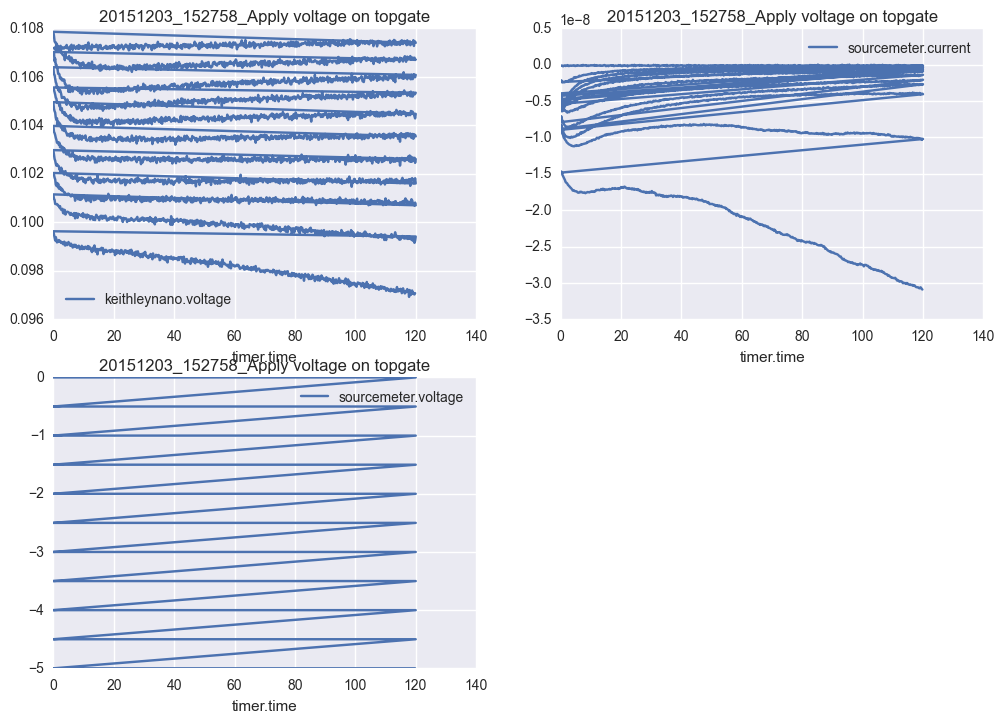

In [58]:
import pylab as pl
tg.clear_plot()
pl.figure(figsize=(12,8))
tg.plot('timer.time','keithleynano.voltage', ax = pl.subplot(221))
tg.plot('timer.time', 'sourcemeter.current', ax = pl.subplot(222))
tg.plot('timer.time', 'sourcemeter.voltage', ax = pl.subplot(223))
while tg.running:
    tg.update_plot()

In [56]:
globaltimer = squidpy.instrument('Timer', 'globaltimer')

In [59]:
allthethings = {'keithleycurrent': ['current'],
                'keithleynano': ['voltage'],
                'keithleysource': ['voltage', 'current'],
                'ppms': ['temperature', 'field'],
                'timer': ['time'],
                'globaltimer': ['time']}

In [60]:
tg = squidpy.Experiment('Apply voltage on topgate')
tg.sweep('timer.time')[0:20*60:.2]
tg.measure(allthethings)
tg.run()

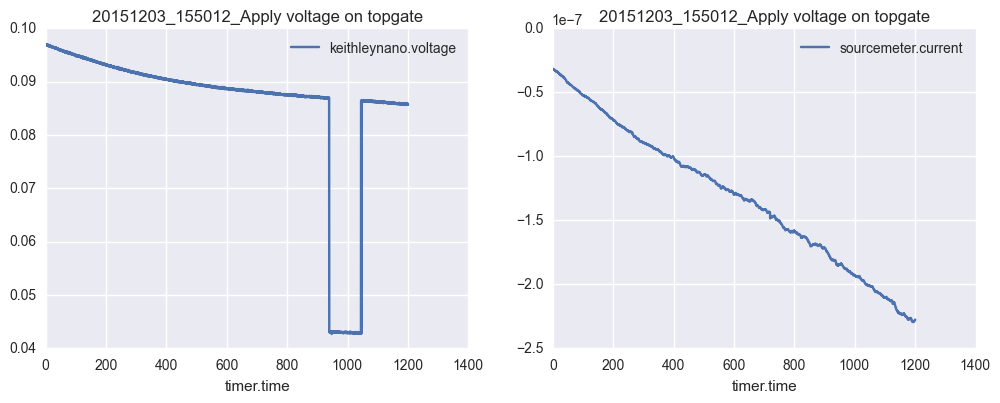

In [67]:
import pylab as pl
tg.clear_plot()
pl.figure(figsize=(12,4))
tg.plot('timer.time','keithleynano.voltage', ax = pl.subplot(121))
tg.plot('timer.time', 'sourcemeter.current', ax = pl.subplot(122))
while tg.running:
    tg.update_plot()

Change the source current to .5$\mu$A to see if current in gel is correlated to bias current

In [65]:
keithleycurrent.current = .5e-6

Change it back

In [66]:
keithleycurrent.current = 1e-6

In [68]:
tg = squidpy.Experiment('Apply voltage on topgate - wait to saturate')
tg.sweep('timer.time')[0:60*60:.2]
tg.measure(allthethings)
tg.run()

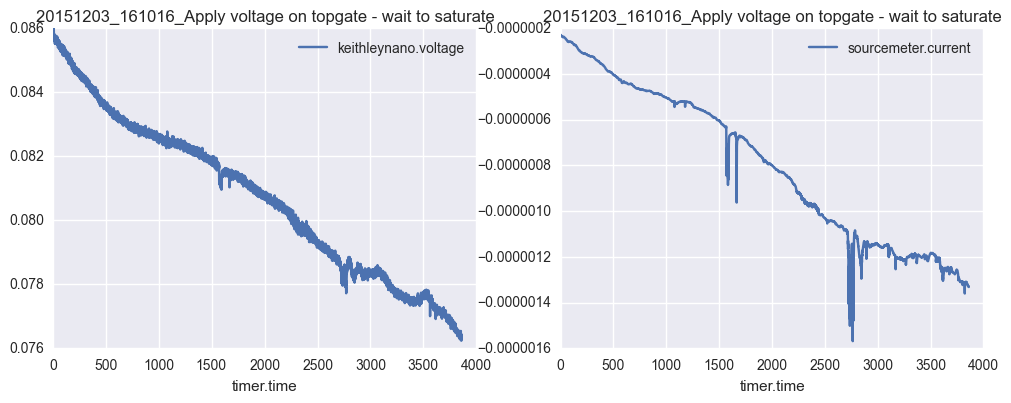

In [77]:
tg.clear_plot()
pl.figure(figsize=(12,4))
tg.plot('timer.time','keithleynano.voltage', ax = pl.subplot(121))
tg.plot('timer.time', 'sourcemeter.current', ax = pl.subplot(122))
while tg.running:
    tg.update_plot()

Lower voltage at t=1080s

In [71]:
keithleysource.voltage = -5.5

Lower voltage at t = 1180s

In [75]:
keithleysource.voltage = -6

In [81]:
keithleynano.voltage/1e-6

73075.91380000001

In [82]:
cool = squidpy.Experiment('Cool down to 10K')
cool.do_while('ppms.temperature > 10')
cool.measure(allthethings)
ppms.temperature = 10
cool.run()

In [56]:
cool = pd.read_csv('data/20151203_172826_Cool down to 10K.dat', sep='\t')[:4884]

<IPython.core.display.Javascript object>


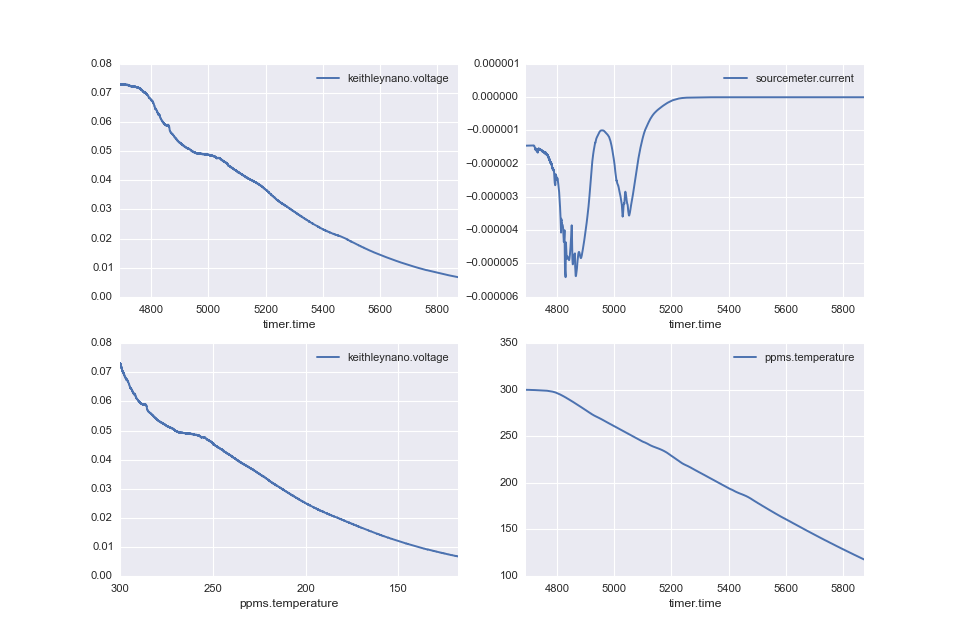

In [57]:
pl.figure(figsize=(12,8))
cool.plot('timer.time','keithleynano.voltage', ax = pl.subplot(221))
cool.plot('timer.time', 'sourcemeter.current', ax = pl.subplot(222))
cool.plot('ppms.temperature','keithleynano.voltage', ax = pl.subplot(223))
cool.plot('timer.time', 'ppms.temperature', ax = pl.subplot(224))

In [84]:
keithleysource.output='off'

In [88]:
cool.running

True

In [89]:
ppms.temperature

10.0004

In [7]:
ppms.temperature = 200

In [68]:
allthethings = {'keithleycurrent': ['current'],
                'keithleynano': ['voltage'],
                'keithleysource': ['voltage', 'current'],
                'ppms': ['temperature', 'field'],
                'timer': ['time']}

In [9]:
cool = squidpy.Experiment('Warm up to 200K')
cool.do_while('ppms.temperature < 200')
cool.measure(allthethings)
ppms.temperature = 10
cool.run()

In [11]:
import pylab as pl

In [17]:
keithleycurrent.output

{'currentsource.current': 1e-06}

In [63]:
cool = pd.read_csv('data/20151203_194328_Warm up to 200K.dat', sep='\t')

<IPython.core.display.Javascript object>


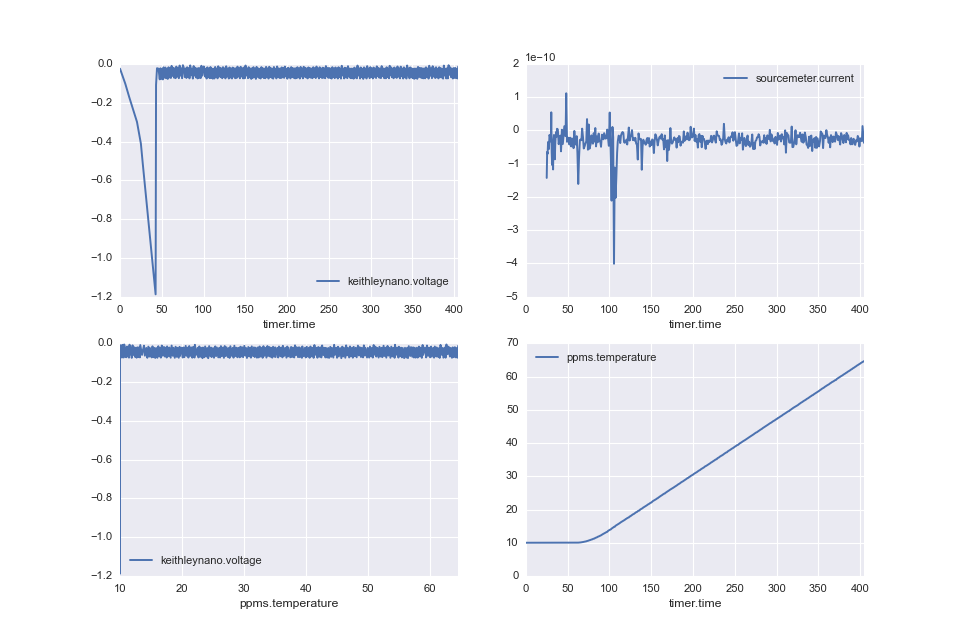

In [64]:
pl.figure(figsize=(12,8))
cool.plot('timer.time','keithleynano.voltage', ax = pl.subplot(221))
cool.plot('timer.time', 'sourcemeter.current', ax = pl.subplot(222))
cool.plot('ppms.temperature','keithleynano.voltage', ax = pl.subplot(223))
cool.plot('timer.time', 'ppms.temperature', ax = pl.subplot(224))

In [23]:
ppms.temperature = 60

In [66]:
ppms.temperature

59.9983

In [10]:
allthethings = {'keithleycurrent': ['current'],
                'keithleynano': ['voltage'],
                'keithleysource': ['voltage', 'current'],
                'ppms': ['temperature', 'field'],
                'timer': ['time']}

In [13]:
warm = squidpy.Experiment('Warm up to 300K')
warm.do_while('ppms.temperature < 200')
warm.measure(allthethings)
ppms.temperature = 300
warm.run()

<IPython.core.display.Javascript object>


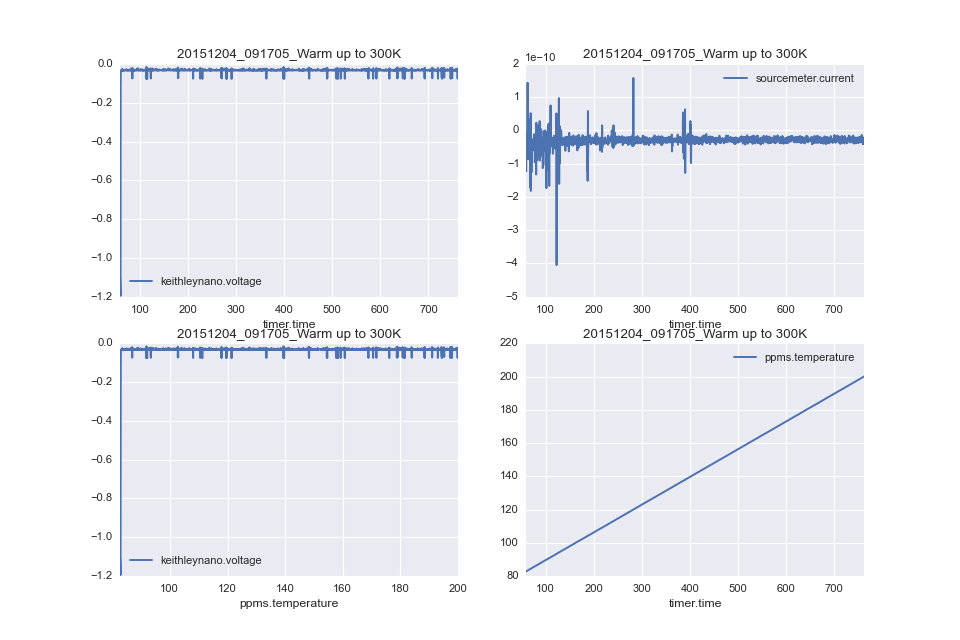

In [17]:
warm.clear_plot()
pl.figure(figsize=(12,8))
warm.plot('timer.time','keithleynano.voltage', ax = pl.subplot(221))
warm.plot('timer.time', 'sourcemeter.current', ax = pl.subplot(222))
warm.plot('ppms.temperature','keithleynano.voltage', ax = pl.subplot(223))
warm.plot('timer.time', 'ppms.temperature', ax = pl.subplot(224))

In [20]:
ppms.temperature

300.0789

In [37]:
keithleysource.current

-2.199657e-11

In [40]:
globaltimer = squidpy.instrument('Timer', 'globaltimer')

In [41]:
allthethings = {'keithleycurrent': ['current'],
                'keithleynano': ['voltage'],
                'keithleysource': ['voltage', 'current'],
                'ppms': ['temperature', 'field'],
                'timer': ['time'],
               'globaltimer': ['time']}

In [ ]:
topgate = squidpy.Experiment('Apply voltage on topgate')
topgate.sweep('keithleysource.voltage')[-6:0:0.5]
topgate.sweep('timer.time')[0:2*60:.2]
topgate.measure(allthethings)